<a href="https://colab.research.google.com/github/SabinSapota/Machine-Learning/blob/main/flight_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Flight price Prediction**

In [1]:
import pandas as pd
pd.set_option('display.max_columns',35)


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [105]:
df=pd.read_excel('/content/drive/MyDrive/spam/Data_Train.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [ ]:
# columns with missing value
[col for col in df.columns if df[col].isna().any()]

['Route', 'Total_Stops']

In [ ]:
# unique value in each column
df.apply(lambda x:len(x.unique()))

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               129
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           6
Additional_Info      10
Price              1870
dtype: int64

In [106]:
df['Date_of_Journey'] =pd.to_datetime(df.Date_of_Journey)   # changing to date/time format
df['Arrival_Time']=pd.to_datetime(df.Arrival_Time)
df['Dep_Time']=pd.to_datetime(df.Dep_Time)


In [107]:
df['journey_month']=df.Date_of_Journey.dt.month  # extarcting month
df['journey_day']=df.Date_of_Journey.dt.day # extracting day

In [108]:
df.drop('Date_of_Journey',axis=1,inplace=True) # droping 

In [109]:
df=df.dropna()

In [9]:
df.isna().sum()  # check for nan

Airline            0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
journey_month      0
journey_day        0
dtype: int64

In [10]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_month,journey_day
0,IndiGo,Banglore,New Delhi,BLR → DEL,2021-07-22 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,3,24
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-07-22 05:50:00,2021-07-22 13:15:00,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2021-07-22 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2021-07-22 18:05:00,2021-07-22 23:30:00,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2021-07-22 16:50:00,2021-07-22 21:35:00,4h 45m,1 stop,No info,13302,1,3


In [110]:
df['dep_hour']=df['Dep_Time'].dt.hour
df['dep_min']=df['Dep_Time'].dt.minute

In [111]:
df['arrive_hour']=df['Arrival_Time'].dt.hour
df['arrive_min']=df['Arrival_Time'].dt.minute

In [112]:
df.drop(['Arrival_Time','Dep_Time'],axis=1,inplace=True)

In [14]:
df.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_month,journey_day,dep_hour,dep_min,arrive_hour,arrive_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15


In [15]:
df.Duration

0        2h 50m
1        7h 25m
2           19h
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680        3h
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [113]:
# here we need to change format of the duration column into proper so that machine can understand
duration=list(df.Duration)
for i in range(len(duration)):
  if len(duration[i].split(' '))==2:
    pass
  else:
     if 'h' in duration[i]:
       duration[i]=duration[i]+' 0m'
     else:
        duration[i]='0h '+duration[i]


In [114]:
df['Duration']=duration  # after looing assigning to original column

In [18]:
df.Duration

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [115]:
df['duration_hr']=df.Duration.apply(lambda x:x.split(' ')[0][0:-1])  # extracting hour from duation column
df['duration_min']=df.Duration.apply(lambda x:x.split(' ')[1][0:-1])  # extracting minute from duration column

In [20]:
df.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_month,journey_day,dep_hour,dep_min,arrive_hour,arrive_min,duration_hr,duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,3,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,9,25,4,25,19,0


In [116]:
df.drop('Duration',axis=1,inplace=True)

In [117]:
df.duration_hr=df['duration_hr'].astype(int)   # changing data type
df.duration_min=df['duration_min'].astype(int)

In [23]:
df.dtypes

Airline            object
Source             object
Destination        object
Route              object
Total_Stops        object
Additional_Info    object
Price               int64
journey_month       int64
journey_day         int64
dep_hour            int64
dep_min             int64
arrive_hour         int64
arrive_min          int64
duration_hr         int64
duration_min        int64
dtype: object

In [118]:

# categoricals columns
cat_col=[col for col in df.columns if df[col].dtype=='O']
cat_col

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [119]:
#continous/numeric columns
cont_col=[col for col in df.columns if df[col].dtype!='O']
cont_col

['Price',
 'journey_month',
 'journey_day',
 'dep_hour',
 'dep_min',
 'arrive_hour',
 'arrive_min',
 'duration_hr',
 'duration_min']

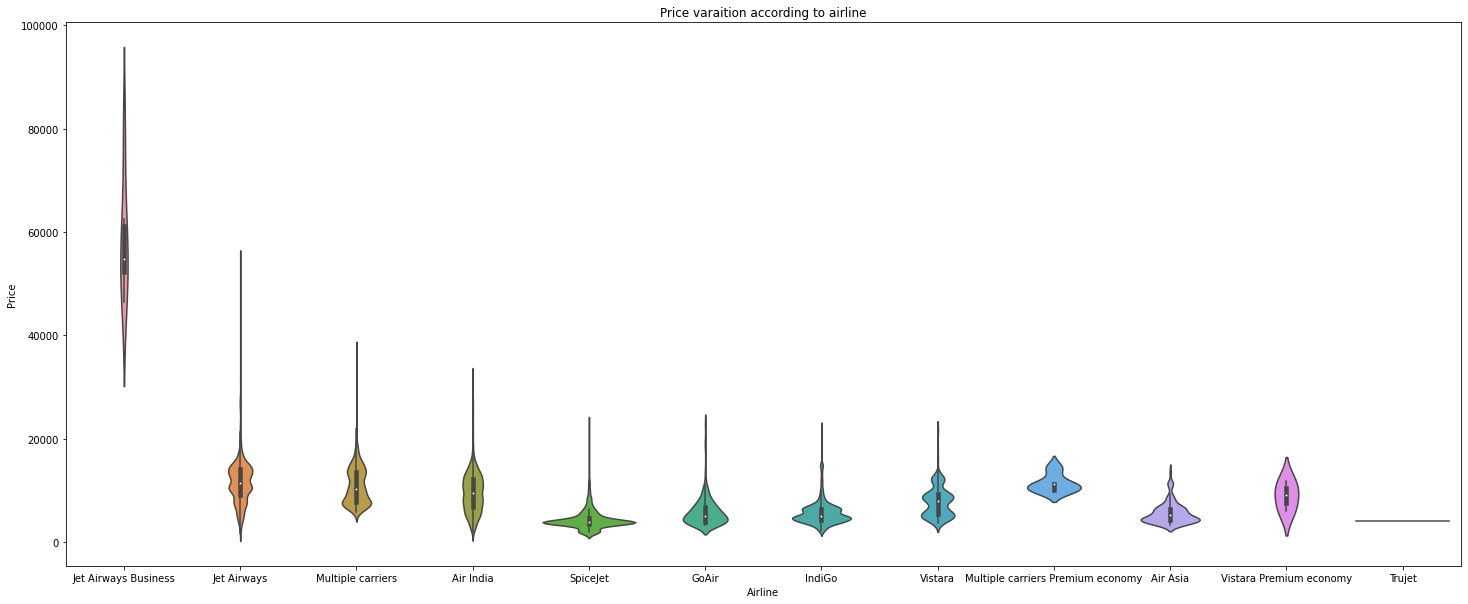

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(25,10))
sns.violinplot(data=df.sort_values(by='Price',ascending=False),x='Airline',y='Price')
plt.title('Price varaition according to airline');


Jet airyaws business  has large fluctuation in price than compared to orther airline

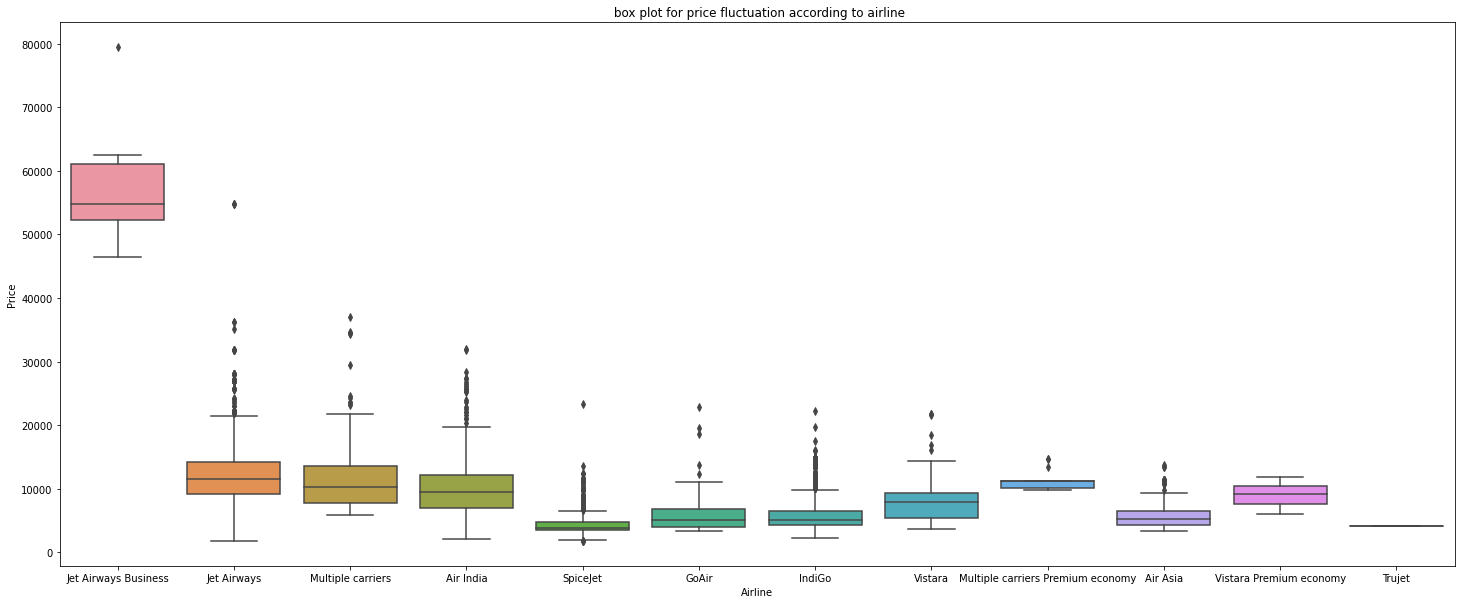

In [122]:

plt.figure(figsize=(25,10))
sns.boxplot(data=df.sort_values(by='Price',ascending=False),x='Airline',y='Price')
plt.title(' box plot for price fluctuation according to airline');

jet airline business price is high compared to  orther airline.

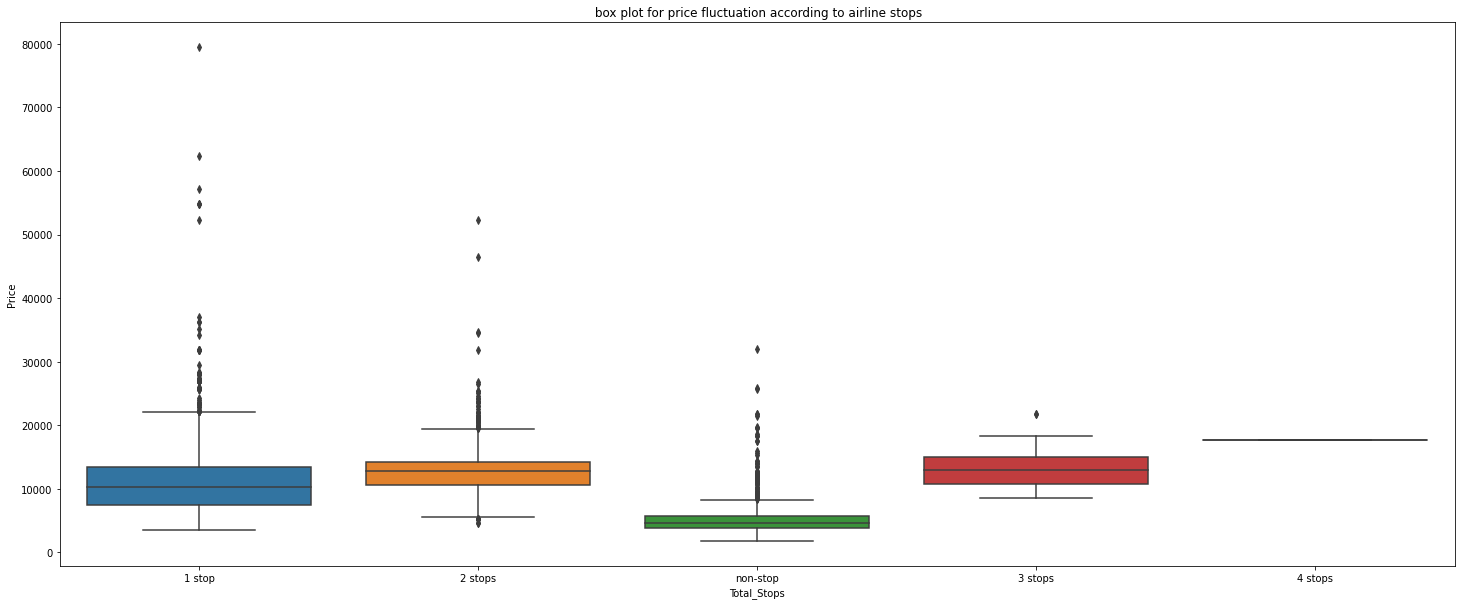

In [123]:

plt.figure(figsize=(25,10))
sns.boxplot(data=df.sort_values(by='Price',ascending=False),x='Total_Stops',y='Price')
plt.title(' box plot for price fluctuation according to airline stops');

A flight which has single stop has hihg price range .and flight which has 4 stops has less price.In orther words, fligh having 1 stops have high fluctuation in the price where as 4 stops price has least fluctuation.

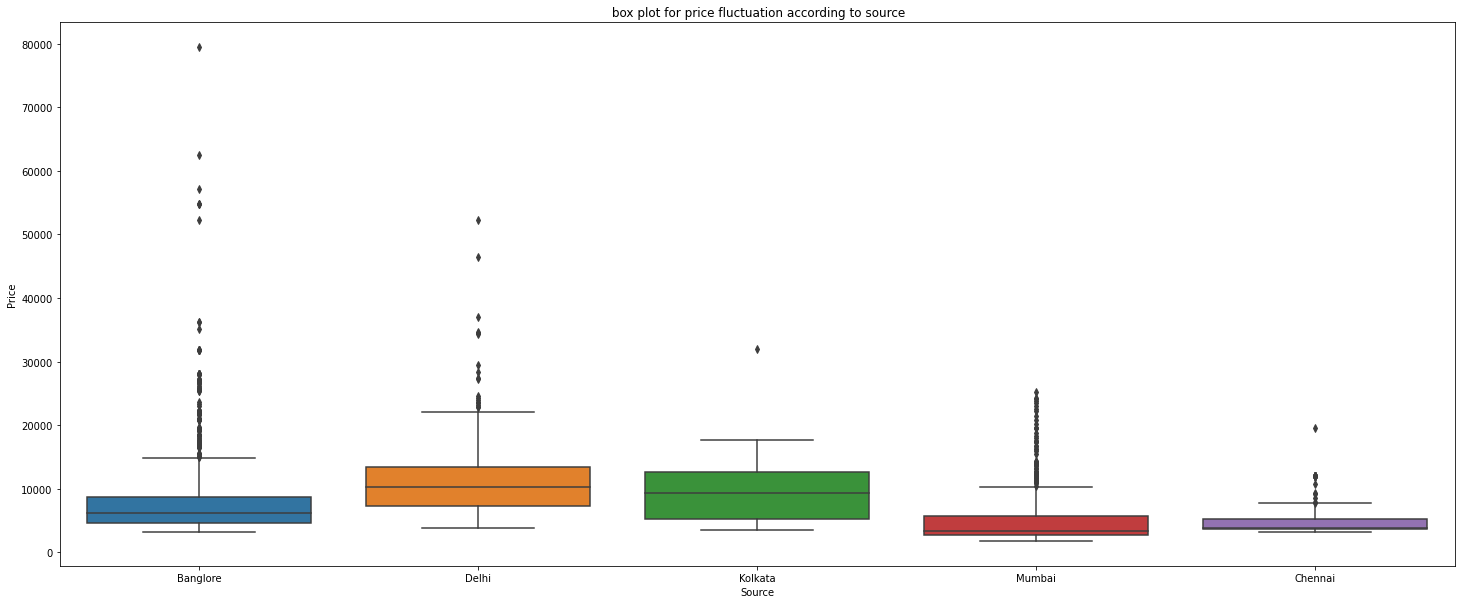

In [124]:
plt.figure(figsize=(25,10))
sns.boxplot(data=df.sort_values(by='Price',ascending=False),x='Source',y='Price')
plt.title(' box plot for price fluctuation according to source');

So, Source having Banglore has huge variationin price and Chinnai has the least variation in price

In [ ]:
df.Destination.value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [126]:
df.Destination=df.Destination.str.replace('New Delhi','Delhi')

In [127]:
df.Destination.value_counts()

Cochin       4536
Banglore     2871
Delhi        2197
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

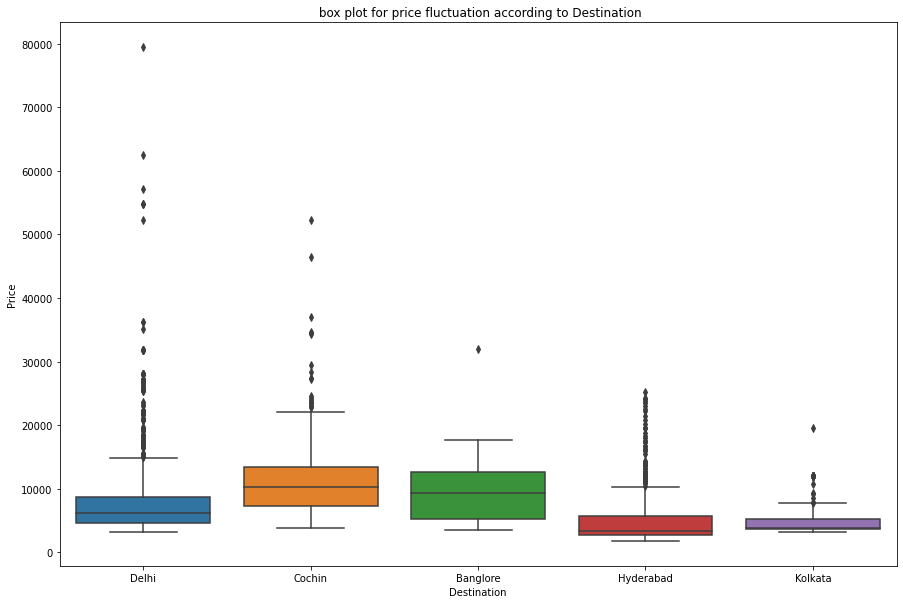

In [128]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df.sort_values(by='Price',ascending=False),x='Destination',y='Price')
plt.title(' box plot for price fluctuation according to Destination');

So, destination having Delhi has high variation in the price and kolkata has least variation in the price

In [29]:
cat_col

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [30]:
my_col=cat_col[0:3]
my_col

['Airline', 'Source', 'Destination']

In [31]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(drop='first',sparse=False)  #droping first columns to reduce multicollinearity

In [32]:
df.shape

(10682, 15)

In [33]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_month,journey_day,dep_hour,dep_min,arrive_hour,arrive_min,duration_hr,duration_min
0,IndiGo,Banglore,Delhi,BLR → DEL,non-stop,No info,3897,3,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [34]:
df1=df.copy() 

In [35]:
df.Source.unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [36]:
df.Destination.unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [37]:
df1_ohe=pd.DataFrame(ohe.fit_transform(df1[my_col]))  # applying one hot encoder to categoricals columns
  

In [38]:
df1_ohe  # one hot encoder removes columns names

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10678,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10679,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [39]:
# putting back columns as onehot encoding removes colums
df1_ohe.columns=ohe.get_feature_names(my_col)  

In [40]:
df1.drop(my_col,axis=1,inplace=True) # dropping the columns that has beeb onehot encoded

In [41]:
df2=pd.concat([df1,df1_ohe],axis=1) # concating initial data frame with onehot encoding data frame

In [42]:
df2.shape # shape after encoding is performed2

(10683, 31)

In [43]:
df2['Route_1']=df2['Route'].str.split('→').str[0]  # cleaning Route columns
df2['Route_2']=df2['Route'].str.split('→').str[1]
df2['Route_3']=df2['Route'].str.split('→').str[2]
df2['Route_4']=df2['Route'].str.split('→').str[3]
df2['Route_5']=df2['Route'].str.split('→').str[4]

In [44]:
df2.head()

,Route,Total_Stops,Additional_Info,Price,journey_month,journey_day,dep_hour,dep_min,arrive_hour,arrive_min,duration_hr,duration_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,...,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Route_1,Route_2,Route_3,Route_4,Route_5
0,BLR → DEL,non-stop,No info,3897.0,3.0,24.0,22.0,20.0,1.0,10.0,2.0,50.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,BLR,DEL,NaN,NaN,NaN
1,CCU → IXR → BBI → BLR,2 stops,No info,7662.0,1.0,5.0,5.0,50.0,13.0,15.0,7.0,25.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,CCU,IXR,BBI,BLR,NaN
2,DEL → LKO → BOM → COK,2 stops,No info,13882.0,9.0,6.0,9.0,25.0,4.0,25.0,19.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,DEL,LKO,BOM,COK,NaN
3,CCU → NAG → BLR,1 stop,No info,6218.0,12.0,5.0,18.0,5.0,23.0,30.0,5.0,25.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,CCU,NAG,BLR,NaN,NaN
4,BLR → NAG → DEL,1 stop,No info,13302.0,1.0,3.0,16.0,50.0,21.0,35.0,4.0,45.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,BLR,NAG,DEL,NaN,NaN


In [45]:
df2['Route_2'].value_counts()

 BOM     3867
 DEL     1552
 BLR      724
 DEL      663
 HYD      621
 HYD      565
 CCU      381
 AMD      263
 JAI      260
 MAA      259
 BLR      236
 COK      213
 BBI      114
 IDR      106
 GAU       88
 NAG       83
 CCU       75
 GOI       72
 PNQ       66
 LKO       61
 BHO       57
 IXR       52
 JDH       41
 ATQ       40
 BDQ       38
 IXB       21
 UDR       19
 RPR       19
 TRV       18
 COK       16
 VGA       15
 IXC       13
 IXU       12
 VNS       11
 PAT       10
 KNU       10
 GWL        8
 HBX        3
 DED        3
 STV        2
 VTZ        1
 NDC        1
 IXZ        1
 JLR        1
 IXA        1
Name: Route_2, dtype: int64

In [46]:
df2.drop('Route',axis=1,inplace=True)

In [47]:
df2.isna().sum()

Total_Stops                                      1
Additional_Info                                  1
Price                                            1
journey_month                                    1
journey_day                                      1
dep_hour                                         1
dep_min                                          1
arrive_hour                                      1
arrive_min                                       1
duration_hr                                      1
duration_min                                     1
Airline_Air India                                1
Airline_GoAir                                    1
Airline_IndiGo                                   1
Airline_Jet Airways                              1
Airline_Jet Airways Business                     1
Airline_Multiple carriers                        1
Airline_Multiple carriers Premium economy        1
Airline_SpiceJet                                 1
Airline_Trujet                 

In [48]:
df3=df2.copy()

In [49]:
for i in ['Route_3','Route_4','Route_5','Route_1','Route_2']:  # filling nan value with 0
  df3[i]=df3[i].fillna('None')

In [50]:
df3.dropna(axis=0,inplace=True)

In [51]:
df3.isna().sum()

Total_Stops                                  0
Additional_Info                              0
Price                                        0
journey_month                                0
journey_day                                  0
dep_hour                                     0
dep_min                                      0
arrive_hour                                  0
arrive_min                                   0
duration_hr                                  0
duration_min                                 0
Airline_Air India                            0
Airline_GoAir                                0
Airline_IndiGo                               0
Airline_Jet Airways                          0
Airline_Jet Airways Business                 0
Airline_Multiple carriers                    0
Airline_Multiple carriers Premium economy    0
Airline_SpiceJet                             0
Airline_Trujet                               0
Airline_Vistara                              0
Airline_Vista

In [52]:
cont_col=[col for col in df3.columns if df3[col].dtype!='O']  # continous columns
cont_col

['Price',
 'journey_month',
 'journey_day',
 'dep_hour',
 'dep_min',
 'arrive_hour',
 'arrive_min',
 'duration_hr',
 'duration_min',
 'Airline_Air India',
 'Airline_GoAir',
 'Airline_IndiGo',
 'Airline_Jet Airways',
 'Airline_Jet Airways Business',
 'Airline_Multiple carriers',
 'Airline_Multiple carriers Premium economy',
 'Airline_SpiceJet',
 'Airline_Trujet',
 'Airline_Vistara',
 'Airline_Vistara Premium economy',
 'Source_Chennai',
 'Source_Delhi',
 'Source_Kolkata',
 'Source_Mumbai',
 'Destination_Cochin',
 'Destination_Delhi',
 'Destination_Hyderabad',
 'Destination_Kolkata']

In [53]:
cat_col=[col for col in df3.columns if df3[col].dtype=='O']  # categoricals columns
cat_col

['Total_Stops',
 'Additional_Info',
 'Route_1',
 'Route_2',
 'Route_3',
 'Route_4',
 'Route_5']

In [54]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()


In [55]:
my_col=cat_col[2:len(cat_col)]
my_col

['Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5']

In [56]:
for i in my_col:
  df3[i]=lb.fit_transform(df3[i])   # applying label encoder

In [57]:
df3.shape

(10681, 35)

In [58]:
df3.head(2)

,Total_Stops,Additional_Info,Price,journey_month,journey_day,dep_hour,dep_min,arrive_hour,arrive_min,duration_hr,duration_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Route_1,Route_2,Route_3,Route_4,Route_5
0,non-stop,No info,3897.0,3.0,24.0,22.0,20.0,1.0,10.0,2.0,50.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,13,29,13,5
1,2 stops,No info,7662.0,1.0,5.0,5.0,50.0,13.0,15.0,7.0,25.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2,25,1,3,5


In [59]:
df3.drop('Additional_Info',axis=1,inplace=True)  # dropping this columns has it no varation in data

In [60]:
df3['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [61]:
my_dict={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}  # lceaning stops columns
my_dict

{'1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4, 'non-stop': 0}

In [62]:
df3['Total_Stops']=df3['Total_Stops'].map(my_dict)

In [63]:
df3.head()

,Total_Stops,Price,journey_month,journey_day,dep_hour,dep_min,arrive_hour,arrive_min,duration_hr,duration_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Route_1,Route_2,Route_3,Route_4,Route_5
0,0,3897.0,3.0,24.0,22.0,20.0,1.0,10.0,2.0,50.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,13,29,13,5
1,2,7662.0,1.0,5.0,5.0,50.0,13.0,15.0,7.0,25.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2,25,1,3,5
2,2,13882.0,9.0,6.0,9.0,25.0,4.0,25.0,19.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,3,32,4,5,5
3,1,6218.0,12.0,5.0,18.0,5.0,23.0,30.0,5.0,25.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2,34,3,13,5
4,1,13302.0,1.0,3.0,16.0,50.0,21.0,35.0,4.0,45.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,34,8,13,5


**Removing Outliers**

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=Warning)

def plot(df,col):
  fig,(ax1,ax2)=plt.subplots(2,1)
  sns.distplot(df[col],ax=ax1)
  sns.boxplot(df[col],ax=ax2)

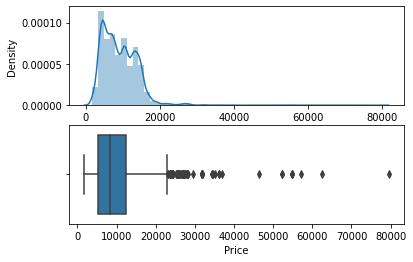

In [ ]:
plot(df3,'Price')  # this columns is positive skwed so outliers exist in the right hand side as shown in figure which need to be fix

In [65]:
import numpy as np
df3['Price']=np.where(df3['Price']>40000,df3['Price'].median(),df3['Price'])   # i haave treated all above 40,000 as outliers

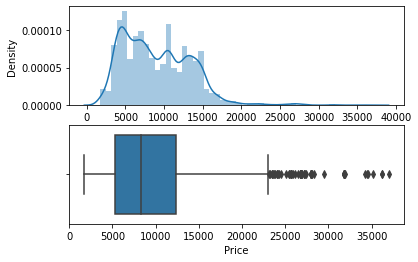

In [ ]:
plot(df3,'Price')  # after removing outliers

In [66]:
X=df3.drop('Price',axis=1)  # independent feature
y=df3.Price  #dependent feature

In [67]:
from sklearn.feature_selection import mutual_info_classif  # feature extraction
mutual_info_classif(X,y)


array([2.14297608e+00, 8.80206245e-01, 1.08342001e+00, 1.40693380e+00,
       1.20563437e+00, 1.81731105e+00, 1.56205405e+00, 1.79649202e+00,
       1.07434096e+00, 5.64780231e-01, 7.27462426e-02, 5.13645431e-01,
       6.36217115e-01, 0.00000000e+00, 4.05193527e-01, 1.05086329e-03,
       2.22587152e-01, 0.00000000e+00, 1.52008653e-01, 9.86889657e-03,
       1.35692795e-01, 1.15970540e+00, 6.21704487e-01, 2.04723507e-01,
       1.21013523e+00, 4.87224514e-01, 1.96943076e-01, 1.27025024e-01,
       2.08463129e+00, 2.76757763e+00, 2.29173375e+00, 1.40641551e+00,
       7.53526135e-01])

In [68]:
df_score=pd.DataFrame(mutual_info_classif(X,y),index=X.columns)
df_score.columns=['feature_score']
df_score=df_score.sort_values(by='feature_score',ascending=False)
df_score

,feature_score
Route_2,2.804673
Route_3,2.299283
Total_Stops,2.170606
Route_1,2.006515
arrive_hour,1.851245
duration_hr,1.784612
arrive_min,1.537750
Route_4,1.442588
dep_hour,1.427467
dep_min,1.232848


In [70]:
df_score.nlargest(13,'feature_score')  # taking feature which are high rank according to score

,feature_score
Route_2,2.804673
Route_3,2.299283
Total_Stops,2.170606
Route_1,2.006515
arrive_hour,1.851245
duration_hr,1.784612
arrive_min,1.537750
Route_4,1.442588
dep_hour,1.427467
dep_min,1.232848


In [71]:
high_feat=list(df_score.nlargest(13,'feature_score').index)
high_feat

['Route_2',
 'Route_3',
 'Total_Stops',
 'Route_1',
 'arrive_hour',
 'duration_hr',
 'arrive_min',
 'Route_4',
 'dep_hour',
 'dep_min',
 'Destination_Cochin',
 'Source_Delhi',
 'journey_day']

In [72]:
X=X[high_feat]

In [73]:
from sklearn.model_selection import train_test_split      # splitting data into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)


In [74]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()

In [75]:
modelml=model.fit(X_train,y_train)

In [76]:
modelml.score(X_train,y_train) 

0.8971729691778731

In [78]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [79]:
def predict(model):    # ceating fuccntion that test performance of my model
  ml=model.fit(X_train,y_train)
  sc=ml.score(X_train,y_train)
  print(f' traing score: {sc}')
  pred=ml.predict(X_test)
  print(f' prediction are:\n{pred}')
  print('*'*30)
  print(f' r2score:{r2_score(y_test,pred)}')
  print('*'*30)
  print(f' mean square error : {mean_squared_error(y_test,pred)}')
  print('*'*30)
  print(f' mean absolute error : {mean_absolute_error(y_test,pred)}')
  print('*'*30)
  print(f' root mean square error : {np.sqrt(mean_squared_error(y_test,pred))}')
  print('*'*30)
  plt.figure(figsize=(10,7))
  sns.displot(y_test-pred)
  plt.title('distribution plot of difference between actual value and predicted value')




 traing score: 0.8970509149811363
 prediction are:
[11116.65833333 13345.48064069  9419.93       ... 11347.51633333
 12298.87695238 14096.58607143]
******************************
 r2score:0.7283108447022735
******************************
 mean square error : 5234322.257738002
******************************
 mean absolute error : 1430.2720450208546
******************************
 root mean square error : 2287.8641257159484
******************************


<Figure size 720x504 with 0 Axes>

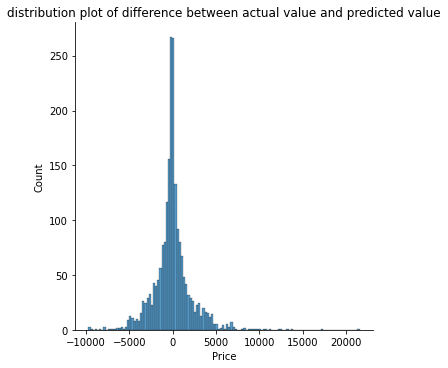

In [80]:
predict(RandomForestRegressor())

we can  see in the above graph, that most of the point lies at zero.so, my model is predicting quite good.Further more, the distribution is more close to normal distribution

In [81]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

 traing score: 0.7729773805631102
 prediction are:
[13605.6 11025.8 10816.2 ... 12256.8 11082.4 13279.8]
******************************
 r2score:0.6318238510823695
******************************
 mean square error : 7093226.113261581
******************************
 mean absolute error : 1727.0679457182969
******************************
 root mean square error : 2663.3111183753167
******************************


<Figure size 720x504 with 0 Axes>

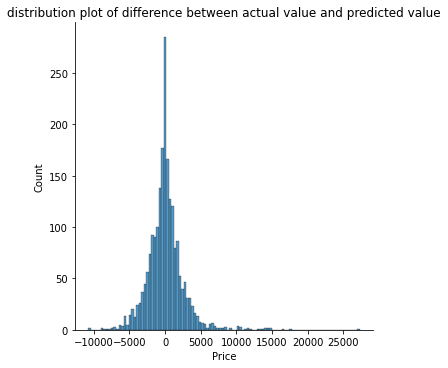

In [82]:
predict(KNeighborsRegressor())

 traing score: 0.5025810425488053
 prediction are:
[13010.33422692 10882.59711146  9544.22265529 ... 10826.86312358
 11443.87283678 10540.82804633]
******************************
 r2score:0.4931050847201003
******************************
 mean square error : 9765760.928058658
******************************
 mean absolute error : 2287.823837234646
******************************
 root mean square error : 3125.021748413706
******************************


<Figure size 720x504 with 0 Axes>

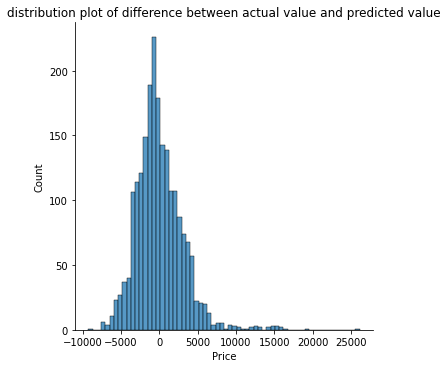

In [83]:
predict( LinearRegression())

 traing score: 0.7682431535662436
 prediction are:
[10008.         11901.          8478.5        ... 11855.1
 11629.14285714 12926.58333333]
******************************
 r2score:0.5325219541050872
******************************
 mean square error : 9006361.471992422
******************************
 mean absolute error : 1753.6990617858921
******************************
 root mean square error : 3001.060058044894
******************************


<Figure size 720x504 with 0 Axes>

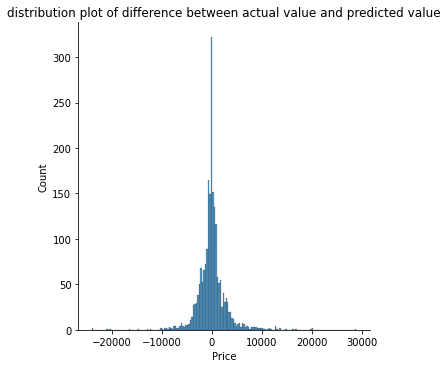

In [ ]:
predict(DecisionTreeRegressor())

**HYpertunning**

In [84]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()


In [85]:
n_estimators=[int(x) for x in np.linspace(100,1200,6)]
max_depth=[int(x) for x in np.linspace(5,30,4)]

In [87]:
max_depth

[5, 13, 21, 30]

In [95]:
rand_grid={'max_features':['auto','sqrt'] ,
           'max_depth':[5, 13, 21, 30],
                     'min_samples_split':[5,10,15,100],
           'n_estimators':n_estimators
           }

In [96]:
rand_grid

{'max_depth': [5, 13, 21, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [5, 10, 15, 100],
 'n_estimators': [100, 320, 540, 760, 980, 1200]}

In [97]:

rf_random=RandomizedSearchCV(estimator=model,param_distributions=rand_grid,cv=3,verbose=2,n_jobs=-1)

In [98]:
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  3.0min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [99]:
rf_random.best_params_

{'max_depth': 30,
 'max_features': 'auto',
 'min_samples_split': 15,
 'n_estimators': 540}

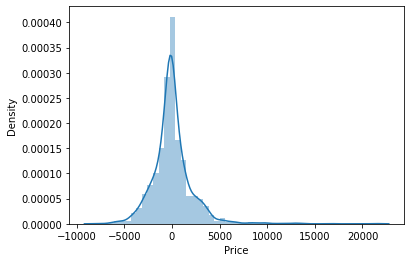

In [101]:
y_pre=rf_random.predict(X_test)
sns.distplot(y_test-y_pre)

In [103]:
from sklearn.metrics import r2_score,accuracy_score
r2_score(y_test,y_pre)  

0.7715532072028657

So, by doing hypertunning for random forest regressor we have raised R2 value from .72 to .77